In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import sys, os
sys.path.append('../../src/')
# import toolbox
from toolbox import *

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Choose copula by AIC

result_names = ['BBT_Tiingo',
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',
                'BBT_future_BITX',
                'BBT_future_BITW20', 
                'BBT_future_BITW70', 
                'BBT_future_BITW100', 
                'BBT_future_CRIX']

# result_names = ['BBT_future_CRIX']

coin_names = ['btc', 'ada', 'eth', 'ltc', 'xrp',
              'BITX', 'BITW20', 'BITW70', 'BITW100', 'CRIX']

result_coin_mapper = dict(zip(result_names, coin_names))

# l = pd.read_json('../../results/BBT_future_Tiingo_ada/MM/likelihood.json') # likelihood 
l = pd.read_json('../../results/BBT_future_CRIX/MM/likelihood.json') # likelihood 
# l *= 300 # 300 data points
# l = l.iloc[[0,1,3,4,5,6,7]] #remove t copula capped

In [146]:
l = pd.read_json('../../results/%s/MM/likelihood.json'%'BBT_future_CRIX') # likelihood 
l

,83.csv,68.csv,6.csv,54.csv,40.csv,41.csv,7.csv,55.csv,69.csv,82.csv,...,9.csv,8.csv,72.csv,66.csv,70.csv,64.csv,58.csv,59.csv,65.csv,71.csv
Gaussian,352.984944,368.026153,383.763538,470.271087,446.845920,414.911831,359.697681,462.226129,358.869987,307.547198,...,320.468191,371.528430,344.238344,397.167990,350.340263,417.734046,430.723524,389.668790,407.939943,344.135727
t_Copula,359.169677,443.030447,503.883179,476.479413,560.644435,551.263905,504.571491,468.842122,403.217371,394.848372,...,498.671353,508.371406,433.101943,451.175159,437.860630,423.679747,498.485024,474.920595,451.925216,433.933218
t_Copula_Capped,359.169675,442.074074,500.994537,476.479412,550.246670,540.409934,500.975670,468.842116,426.613934,390.326890,...,494.356969,505.818405,427.256670,451.175166,432.411359,423.679747,493.029284,467.722969,451.925210,428.049679
Clayton,-756.917647,-952.221265,-14640.785273,-685.843378,-4366.445282,-7112.210405,-14962.963657,-725.331862,-954.997028,-1701.157575,...,-10005.668998,-14642.647011,-926.383517,-742.485551,-874.328643,-672.853559,-1507.986557,-781.481128,-838.271935,-911.744940
Frank,218.820694,317.763737,422.499847,410.340463,470.066795,461.341253,428.304135,399.376909,308.457960,238.870183,...,438.882453,438.602398,286.180863,345.624825,294.995239,350.424294,392.611535,362.972118,362.404080,287.150356
Gumbel,344.654500,350.622006,382.103202,457.487925,403.246052,382.161805,355.870656,448.142229,347.214346,294.431632,...,250.577280,360.175804,336.505037,378.746921,342.414006,425.799872,396.480946,319.073775,397.484245,336.046832
Plackett,350.187111,385.631065,415.513014,458.180293,440.564471,433.074227,407.484607,447.210787,383.742215,307.606388,...,373.607228,412.867582,373.147606,410.312769,381.439866,433.715198,417.240658,387.091903,420.535911,373.982000
Gauss Mix Indep,373.091264,417.473229,430.472699,487.317459,425.136515,407.620569,410.300652,480.742487,415.414202,320.493588,...,315.545199,421.686898,401.778384,441.081725,411.804529,440.118276,449.263016,407.764439,449.152425,404.413891
rotGumbel,367.093529,407.187299,442.603368,482.779547,481.742375,466.568067,437.497594,474.751398,404.881085,330.403054,...,444.755559,447.183634,392.629821,430.516678,401.024347,440.104193,454.219466,434.441278,433.163122,394.732564


In [147]:
NIG_l = pd.read_csv('LL_NIG1.csv')

NIG_l = NIG_l.iloc[:,:2]

NIG_l.columns = ['file', 'NIG']
NIG_l.iloc[:,0] = NIG_l.iloc[:,0].apply(lambda x: str(x)+'.csv')
# NIG_l
# NIG_l.set_index('Unnamed: 0', )

In [148]:
l = l.T.reset_index()

In [149]:
copula_names = ['Gaussian',	't_Copula',	't_Copula_Capped', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep',	'NIG']
# l.loc[:,['Gaussian', 'Clayton']]

In [150]:
l = l.merge(NIG_l, left_on='index', right_on='file')
l = l.loc[:,['index']+copula_names]
l = l.set_index('index').T
l.to_html('LL_withNIG_Crix.html')


In [151]:
# l.to_json('../../results/BBT_future_CRIX/MM/likelihood.json')
l = pd.read_json('../../results/BBT_future_Tiingo_xrp/MM/likelihood.json') # likelihood 
NIG_l_xrp = pd.read_csv('LL_NIG_xrp.csv')
# list(NIG_l_xrp.columns)[:-1]
l

,97.csv,83.csv,68.csv,6.csv,54.csv,40.csv,41.csv,7.csv,55.csv,69.csv,...,8.csv,72.csv,66.csv,99.csv,70.csv,64.csv,58.csv,59.csv,65.csv,71.csv
Gaussian,111.243702,81.083171,95.351850,59.432220,101.395664,107.622228,113.383962,63.612017,99.626721,92.225851,...,64.032662,91.652500,106.045493,118.671060,92.470942,89.258582,94.496312,96.771242,101.167370,91.705472
t_Copula,115.455527,86.549079,114.531064,62.479659,107.441723,108.645061,114.245765,66.728796,106.604415,111.894570,...,-0.008154,78.678106,92.338708,120.078388,79.727597,66.967741,67.867964,71.596468,80.748494,78.619597
t_Copula_Capped,115.455528,89.533636,114.348733,62.479659,107.441713,108.646007,114.245765,66.729097,106.604423,111.679664,...,-0.008168,78.678097,92.338701,120.078383,79.727589,66.967732,67.867955,71.596459,80.748486,78.619588
Clayton,100.151842,90.979000,105.000541,67.381291,113.746494,123.498345,125.899105,68.784073,112.241612,104.425854,...,68.757373,103.588270,109.048767,76.007254,104.007125,96.725820,107.441899,108.784271,104.788798,103.650521
Frank,43.771978,5.456224,14.741821,75.784526,53.228940,86.369946,88.411592,80.577456,45.088738,10.025528,...,81.543987,-6.616492,24.769836,49.572690,-5.839833,11.952652,43.706320,46.708294,39.718542,-8.176452
Gumbel,107.476790,72.034523,85.285281,60.810480,91.615652,90.879777,96.197258,66.196221,90.114111,81.614502,...,67.097154,78.796896,92.961064,113.618937,81.543255,79.548902,85.661549,88.120056,91.393581,80.204207
Plackett,128.580311,84.996532,93.866969,92.813838,105.515656,112.844949,117.346510,97.448368,103.220433,90.508242,...,98.686413,87.495224,99.700900,141.159520,89.284300,86.883174,98.151774,100.935948,98.281426,86.935231
Gauss Mix Indep,131.649219,87.212613,102.711053,60.207382,112.025060,107.729836,113.446215,64.378425,110.918492,98.802709,...,64.808113,92.768796,109.401927,141.893554,95.206425,93.361486,105.508355,107.937685,105.657101,92.201299
rotGumbel,126.447262,102.600239,118.136938,78.783069,121.027963,125.554666,129.745705,81.981577,119.880154,116.224554,...,82.308267,117.434599,123.681275,136.515371,117.652923,109.220807,114.626109,116.525134,116.221730,116.847916


In [8]:
# l.loc['ind',:] = [int(x.replace('.csv','')) for x in list(l.columns)]
# l = l.T.sort_values('ind')
# l = l.iloc[:,:-1]
# l.loc[:,'NIG'] = list(NIG_l_xrp.columns)[:-1]
# l.NIG = l.NIG.astype(float)

In [9]:
# l.to_json('../../results/BBT_future_Tiingo_xrp/MM/likelihood.json')

In [333]:
k = {'Gaussian':1,
     't_Copula':2, 
     't_Copula_Capped':2, 
     'Clayton':1, 
     'Frank':1, 
     'Gumbel':1,  
     'Plackett':1,  
     'Gauss Mix Indep':2, 
     'NIG':3, 
     'rotGumbel':1}

copula_names = list(k.keys())

def AIC_table(l, drop_t_Copula_Capped=True):
    # l likelihood table
    if drop_t_Copula_Capped:
        l = l.drop(index='t_Copula_Capped')
       
    copula_names = list(l.index)
    AIC = l.copy()
    
    for c in copula_names:
        AIC.loc[c,:] = -2*l.loc[c,:]+2*k[c]
        
    return AIC

In [334]:
_AIC = AIC_table(l, True)
_copula = _AIC.idxmin(axis='rows')
_copula = pd.DataFrame(_copula).reset_index()
_copula.columns = ['file', 'copula']
copula_to_use[result] = _copula

copula_count = pd.pivot_table(_copula, index=['copula'], aggfunc='count')

In [335]:
AIC_results = dict()
copula_to_use = dict()
copula_count = dict()
place=0 # lowest 

for result in result_names:
    l = pd.read_json('../../results/%s/MM/likelihood.json'%result) # likelihood 
#     l *=300 # 300 data points
    
    _AIC = AIC_table(l, True)
    AIC_results[result] = _AIC
    
    _copula = []
    for i in range(len(_AIC.columns)):
        _sorted = _AIC.iloc[:,i].sort_values()
        _copula.append(pd.DataFrame({'file':_AIC.columns[i],
                                     'copula': _sorted.index[place]}, index=[0]))
#     _copula = _AIC.idxmin(axis='rows')
    _copula = pd.DataFrame(pd.concat(_copula)).reset_index(drop=True)
#     _copula.columns = ['file', 'copula']
    copula_to_use[result] = _copula
    copula_count[result]= pd.pivot_table(_copula, index=['copula'], aggfunc='count')
    
    
copula_count_summary = pd.DataFrame(columns=copula_names)

for rm in result_names:
    c = copula_count[rm]
    c.index.name = None
    c.columns = [result_coin_mapper[rm]]
    copula_count_summary = copula_count_summary.append(c.T)
    
copula_count_summary = copula_count_summary.fillna(0)

copula_count_summary = pd.concat([copula_count_summary.loc[:,c] for c in copula_names if c != 't_Copula_Capped'],
          axis=1)

copula_count_summary.loc['sum',:] = copula_count_summary.sum()
copula_count_summary = copula_count_summary.astype(np.int)

_index = ['btc','eth','ada','ltc','xrp','BITX','CRIX','BITW100','BITW20','BITW70']
# print(copula_count_summary.reindex(_index).to_latex())
copula_count_summary.reindex(_index)



/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,Gaussian,t_Copula,Clayton,Frank,Gumbel,Plackett,Gauss Mix Indep,NIG,rotGumbel
btc,0,98,0,1,1,10,1,0,1
eth,0,3,0,0,0,6,8,0,95
ada,0,48,0,0,0,0,1,0,58
ltc,0,23,0,0,0,0,3,0,86
xrp,0,0,0,0,0,31,3,0,78
BITX,0,41,0,0,0,0,16,0,24
CRIX,0,58,0,0,0,0,0,30,0
BITW100,0,44,0,0,0,0,8,0,29
BITW20,0,0,0,0,0,0,0,0,81
BITW70,0,0,0,0,0,0,0,0,81


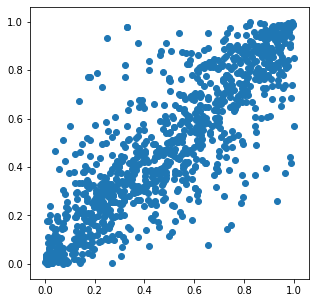

In [372]:
C = Plackett({'theta':31.36}, stats.uniform, stats.uniform)
uv = C.sample(1000)

plt.figure(figsize=(5,5))
plt.scatter(uv[:,0], uv[:,1])

../../src/toolbox.py:294: RuntimeWarning: invalid value encountered in power
  part2 = np.sin(self.alpha * (U + xi)) / (np.cos(U) ** (1 / self.alpha))
../../src/toolbox.py:295: RuntimeWarning: invalid value encountered in power
  part3 = (np.cos(U - self.alpha * (U + xi)) / W) ** ((1 - self.alpha) / self.alpha)


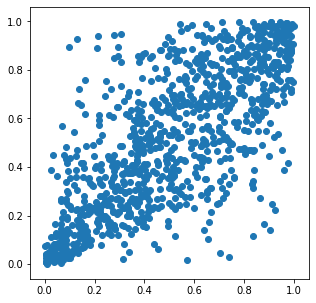

In [373]:
C = rot180Gumbel({'theta':2.243}, stats.uniform, stats.uniform)
uv = C.sample(1000)

plt.figure(figsize=(5,5))
plt.scatter(uv[:,0], uv[:,1])

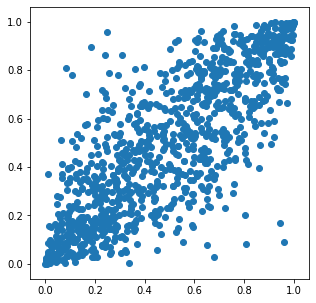

In [371]:
C = Gaussian_Mix_Independent({'rho':.821, 'p':.972}, stats.uniform, stats.uniform)
uv = C.sample(1000)

plt.figure(figsize=(5,5))
plt.scatter(uv[:,0], uv[:,1])

In [336]:
AIC_results = dict()
copula_to_use = dict()
copula_count = dict()
place=0 # second lowest 

for result in result_names:
    l = pd.read_json('../../results/%s/MM/likelihood.json'%result) # likelihood 
#     l *=300 # 300 data points
    
    _AIC = AIC_table(l, True)
    AIC_results[result] = _AIC
    
    _copula = []
    for i in range(len(_AIC.columns)):
        _sorted = _AIC.iloc[:,i].sort_values()
        _copula.append(pd.DataFrame({'file':_AIC.columns[i],
                                     'copula': _sorted.index[place]}, index=[0]))
#     _copula = _AIC.idxmin(axis='rows')
    _copula = pd.DataFrame(pd.concat(_copula)).reset_index(drop=True)
#     _copula.columns = ['file', 'copula']
    copula_to_use[result] = _copula
    copula_count[result]= pd.pivot_table(_copula, index=['copula'], aggfunc='count')
    
    
copula_count_summary = pd.DataFrame(columns=copula_names)

for rm in result_names:
    c = copula_count[rm]
    c.index.name = None
    c.columns = [result_coin_mapper[rm]]
    copula_count_summary = copula_count_summary.append(c.T)
    
copula_count_summary = copula_count_summary.fillna(0)

copula_count_summary = pd.concat([copula_count_summary.loc[:,c] for c in copula_names if c != 't_Copula_Capped'],
          axis=1)

copula_count_summary.loc['sum',:] = copula_count_summary.sum()
copula_count_summary = copula_count_summary.astype(np.int)

_index = ['btc','eth','ada','ltc','xrp','BITX','CRIX','BITW100','BITW20','BITW70']
# print(copula_count_summary.reindex(_index).to_latex())
copula_count_summary.reindex(_index)



/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,Gaussian,t_Copula,Clayton,Frank,Gumbel,Plackett,Gauss Mix Indep,NIG,rotGumbel
btc,0,98,0,1,1,10,1,0,1
eth,0,3,0,0,0,6,8,0,95
ada,0,48,0,0,0,0,1,0,58
ltc,0,23,0,0,0,0,3,0,86
xrp,0,0,0,0,0,31,3,0,78
BITX,0,41,0,0,0,0,16,0,24
CRIX,0,58,0,0,0,0,0,30,0
BITW100,0,44,0,0,0,0,8,0,29
BITW20,0,0,0,0,0,0,0,0,81
BITW70,0,0,0,0,0,0,0,0,81


In [315]:
for i in range(len(_AIC.columns)):
    _sorted = _AIC.iloc[:,i].sort_values()
    _copula.append(pd.DataFrame({'file':_AIC.columns[i],
                                 'copula': _sorted.index[0]}, index=[0]))

In [294]:
row_id = list(_AIC.idxmin(axis='rows'))
column_id = list(_AIC.idxmin(axis='rows').index)

In [295]:
_AIC.loc[row_id[0], column_id[0]]

-765.2286682502

In [273]:
# _index = ['btc','eth','ada','ltc','xrp','BITX','CRIX','BITW100','BITW20','BITW70']

# copula_count_summary.reindex(_index)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,Gaussian,t_Copula,Clayton,Frank,Gumbel,Plackett,Gauss Mix Indep,NIG,rotGumbel
btc,0,98,0,1,1,10,1,0,1
eth,0,3,0,0,0,6,8,0,95
ada,0,48,0,0,0,0,1,0,58
ltc,0,23,0,0,0,0,3,0,86
xrp,0,0,0,0,0,31,3,0,78
BITX,0,41,0,0,0,0,16,0,24
CRIX,0,58,0,0,0,0,0,30,0
BITW100,0,44,0,0,0,0,8,0,29
BITW20,0,0,0,0,0,0,0,0,81
BITW70,0,0,0,0,0,0,0,0,81


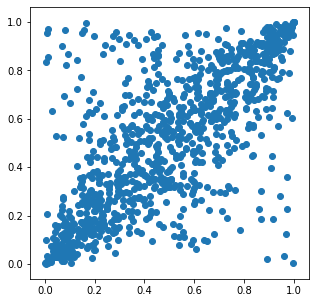

In [241]:
# check T MSE in eth t copula vs gauss mix indep
# explain why GMI is more popular than t copula in eth
# 1. off diagonal noise is managed by the ind 
# 2. 
# 3. Plackett has no tail but some 
# 4. NIG: Indpendence + Tail + Asymmetry; compare with double-t

sys.path.append('../../src/')
from copulae1 import *
# stats.uniform
C = t_Copula({'rho':0.8, 'nu':2}, stats.uniform, stats.uniform, 2)
s = C.sample(1000)

plt.figure(figsize=(5,5))
plt.scatter(s[:,0], s[:,1])

In [30]:
_index = ['btc','eth','ada','ltc','xrp','BITX','CRIX','BITW100','BITW20','BITW70']
copula_count_summary.reindex(_index)

,Gaussian,t_Copula,Clayton,Frank,Gumbel,Plackett,Gauss Mix Indep,NIG,rotGumbel
btc,0,98,0,1,1,10,1,0,1
eth,0,3,0,0,0,6,8,0,95
ada,0,48,0,0,0,0,1,0,58
ltc,0,23,0,0,0,0,3,0,86
xrp,0,0,0,0,0,31,3,0,78
BITX,0,41,0,0,0,0,16,0,24
CRIX,0,63,0,0,0,0,17,0,8
BITW100,0,44,0,0,0,0,8,0,29
BITW20,0,0,0,0,0,0,0,0,81
BITW70,0,0,0,0,0,0,0,0,81


In [31]:
len(os.listdir('../../processed_data/BBT_future_CRIX/train'))

88

In [32]:
# C = t_copula({'rho':0.9, 'nu':2}, )

'2020-12-11 21:00:00+00:00'

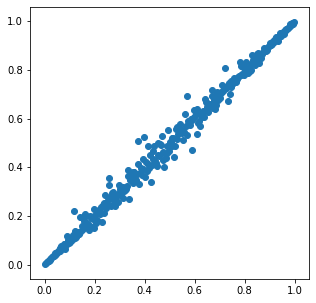

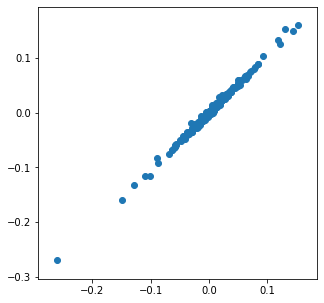

In [33]:
df = pd.read_csv('../../processed_data/BBT_Tiingo/train/22.csv')

rs = df.loc[:,'log return bitcoin']
rf = df.loc[:,'log return future']

import matplotlib.pyplot as plt
import os, sys
sys.path.append('../../src/')
import toolbox
import KDEs as K

kde_rs = K.KDE(rs, 'Gaussian')
kde_rf = K.KDE(rf, 'Gaussian')

u = kde_rs.cdf(rs)
v = kde_rf.cdf(rf)
plt.figure(figsize=(5,5))
plt.scatter(u, v)

plt.figure(figsize=(5,5))
plt.scatter(rs, rf)
df.Date.iloc[0]

In [34]:
copula_to_use[result_names[0]]

,file,copula
0,97.csv,Plackett
1,83.csv,t_Copula
2,68.csv,t_Copula
3,6.csv,t_Copula
4,54.csv,Gauss Mix Indep
5,40.csv,Frank
6,41.csv,t_Copula
7,7.csv,t_Copula
8,55.csv,t_Copula
9,69.csv,t_Copula


In [35]:
OHR = pd.read_csv('../../results/%s/MM/OHR.csv'%result_names[0])

In [36]:
risk_measures = list(np.unique(OHR.loc[:, 'risk measure']))
# ctu.copula

In [56]:
for rn in result_names:
    OHR = pd.read_csv('../../results/%s/MM/OHR.csv'%rn)
    for rm in risk_measures:
        ctu = copula_to_use[rn]
        rh_df = pd.DataFrame()

        for i in range(len(ctu)):
            file = ctu.file[i]
            c = ctu.copula[i]

            _id = (OHR.file==file) & (OHR.copula==c) & (OHR.loc[:,'risk measure']==rm)
            if sum(_id)==0:
                continue
            h = OHR.loc[_id,'OHR'].values[0]

            # Load testing data
            test_df = pd.read_csv('../../processed_data/%s/test/%s'%(rn, file))

            Date = test_df.Date
            rs = test_df.iloc[:,-1]
            rf = test_df.iloc[:,-2]
            rh = rs - h*rf

            rh = pd.DataFrame({'Date':Date, 'rh':rh, 'rs':rs, 'rf':rf, 'h':h, 'copula':c})
            rh_df = rh_df.append(rh)

        rh_df.Date = pd.to_datetime(rh_df.Date)
        rh_df.sort_values('Date', ascending=False, inplace=True)
        rh_df.to_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(rn, rm))

In [113]:
print(risk_measures, '\n',
result_names)

['ERM k=10', 'ES q=0.01', 'ES q=0.05', 'VaR q=0.01', 'VaR q=0.05', 'Variance'] 
 ['BBT_Tiingo', 'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth', 'BBT_future_Tiingo_ltc', 'BBT_future_Tiingo_xrp', 'BBT_future_BITX', 'BBT_future_BITW20', 'BBT_future_BITW70', 'BBT_future_BITW100', 'BBT_future_CRIX']


In [196]:
rn = 'BBT_future_Tiingo_xrp'

rm = 'Variance'
rh1 = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(rn, rm))
rh1.Date = pd.to_datetime(rh1.Date)

rm = 'ES q=0.05'
rh2 = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(rn, rm))
rh2.Date = pd.to_datetime(rh2.Date)

In [197]:
rh1.head()

,Unnamed: 0,Date,rh,rs,rf,h,copula
0,0,2021-05-27 20:00:00+00:00,-0.018473,-0.012393,0.006583,0.923633,Plackett
1,1,2021-05-26 20:00:00+00:00,0.050774,0.080924,0.032643,0.923633,Plackett
2,2,2021-05-25 20:00:00+00:00,0.038937,-0.018555,-0.062245,0.923633,Plackett
3,3,2021-05-24 20:00:00+00:00,-0.146470,-0.059344,0.094330,0.923633,Plackett
4,4,2021-05-21 20:00:00+00:00,-0.076565,-0.177064,-0.108809,0.923633,Plackett


In [198]:
rh2.head()

,Unnamed: 0,Date,rh,rs,rf,h,copula
0,0,2021-05-27 20:00:00+00:00,-0.017535,-0.012393,0.006583,0.781152,Plackett
1,1,2021-05-26 20:00:00+00:00,0.055425,0.080924,0.032643,0.781152,Plackett
2,2,2021-05-25 20:00:00+00:00,0.030068,-0.018555,-0.062245,0.781152,Plackett
3,3,2021-05-24 20:00:00+00:00,-0.133030,-0.059344,0.094330,0.781152,Plackett
4,4,2021-05-21 20:00:00+00:00,-0.092068,-0.177064,-0.108809,0.781152,Plackett


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


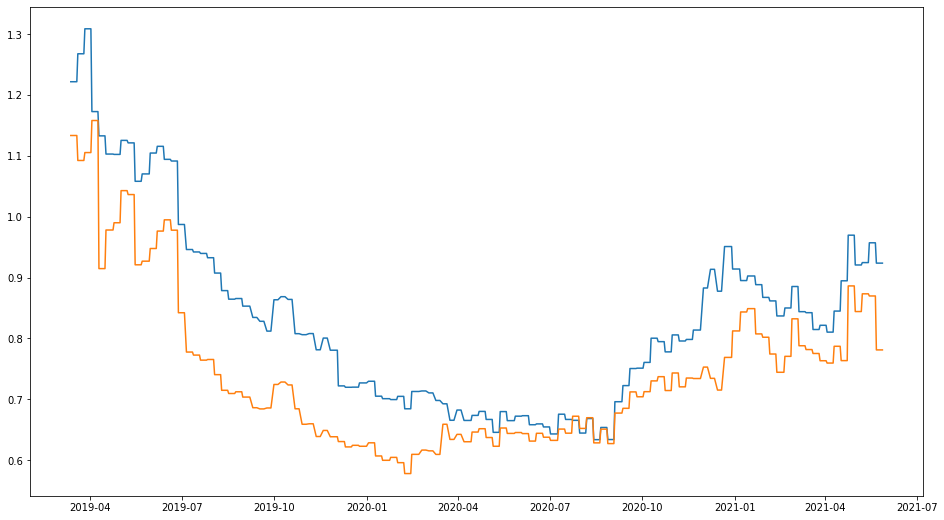

In [199]:
plt.figure(figsize=(16,9))
plt.plot(rh1.Date, rh1.h)
plt.plot(rh1.Date, rh2.h)

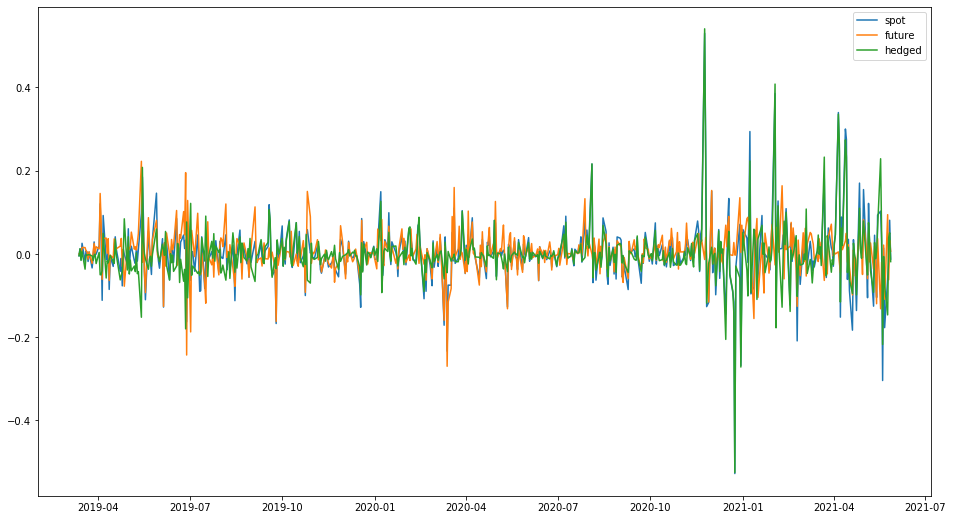

In [211]:
plt.figure(figsize=(16,9))


# plt.plot(rh1.Date, rh1.rs-rh1.rf)
plt.plot(rh1.Date, rh1.rs, label='spot')
plt.plot(rh1.Date, rh1.rf, label='future')

plt.plot(rh1.Date, rh1.rh, label='hedged')
# plt.plot(rh2.Date, rh2.rh)
plt.legend()

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-pack

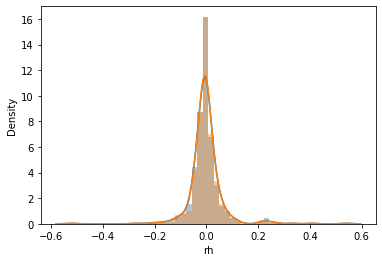

In [206]:
sns.distplot(rh1.rh)
sns.distplot(rh2.rh)
# sns.distplot(rh2.rs-rh2.rf)

In [203]:
print(np.mean(rh1.rh), np.mean(rh2.rh))

-0.0018928453526764295 -0.0016632718545932987


In [204]:
print(toolbox.VaR(0.05, rh1.rh), toolbox.VaR(0.05, rh2.rh), toolbox.VaR(0.05, rh2.rs))

0.0703443166029009 0.07440267912491351 0.10017591548855473


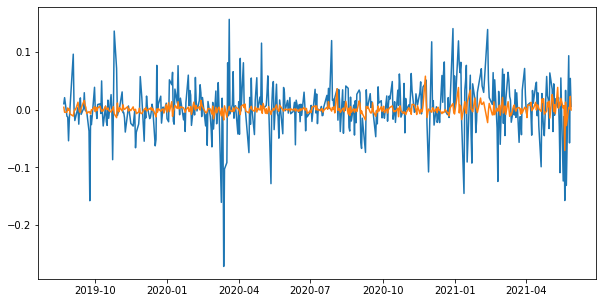

In [182]:
plt.figure(figsize=(10,5))
plt.plot(rh_df.Date, rh_df.rs)
plt.plot(rh_df.Date, rh_df.rh)

In [58]:
name = 'BBT_future_Tiingo_xrp'
ctu = copula_to_use[name]

train = pd.read_csv('../../processed_data/%s/train/%s'%(name, '0.csv'))

train.head()

,Unnamed: 0,Date,PX_LAST,contract_name,xrp Price,log return future,log return xrp
0,5,2021-05-20 20:00:00+00:00,40350.0,BTCM1 Curncy,1.182123,0.021291,0.014197
1,6,2021-05-19 20:00:00+00:00,39500.0,BTCM1 Curncy,1.165459,-0.090465,-0.304108
2,7,2021-05-18 20:00:00+00:00,43240.0,BTCM1 Curncy,1.579682,-0.019694,0.031345
3,8,2021-05-17 20:00:00+00:00,44100.0,BTCM1 Curncy,1.530934,-0.131645,0.102715
4,9,2021-05-14 20:00:00+00:00,50305.0,BTCM1 Curncy,1.381491,0.036850,0.093586


In [59]:
# name = 'BBT_future_BITW70'
# ctu = copula_to_use[name]
# ctu.head()

In [349]:
training_Clayton = pd.DataFrame()
training = pd.DataFrame()
for i in range(len(ctu)):
    row = ctu.iloc[i, :]
    file = row.file
    df = pd.read_csv('../../processed_data/%s/train/%s'%(name, file))
    training = training.append(df)
    if row.copula == 'Clayton':
        training_Clayton = training_Clayton.append(df)
        
training_Clayton = training_Clayton.drop_duplicates('Date')
training_Clayton.Date = pd.to_datetime(training_Clayton.Date)
training_Clayton.sort_values('Date', inplace=True)

training = training.drop_duplicates('Date')
training.Date = pd.to_datetime(training.Date)
training.sort_values('Date', inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Date'

In [ ]:
future = training.loc[:,'PX_LAST']
# spot = training.loc[:,'BITW70 Price']

spot = training.loc[:,'xrp Price']
date = training.Date

plt.figure(figsize=(10,5))
plt.plot(date, spot/spot.iloc[0])
plt.plot(date, future/future.iloc[0])

# plt.plot(training_Clayton.Date, training_Clayton.loc[:, 'xrp Price']/xrp.iloc[-1])
# plt.plot(date, future/future.iloc[-1])

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


AttributeError: 'DataFrame' object has no attribute 'Date'

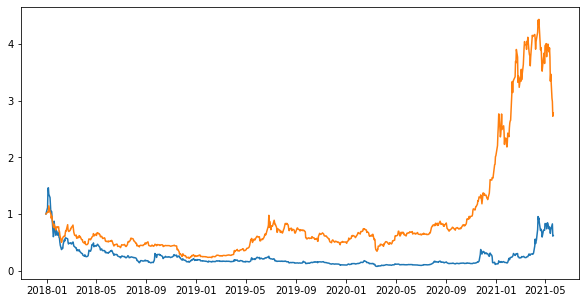

In [350]:
plt.figure(figsize=(10,5))
plt.plot(date, spot/spot.iloc[0], label='spot')
plt.plot(date, future/future.iloc[0], label='future')

_start = training_Clayton.Date.iloc[0]
_end = 0
for i in range(len(training_Clayton)-1):
    start = training_Clayton.Date.iloc[i]
    end =  training_Clayton.Date.iloc[i+1]
    _end = end
    plt.axvspan(start, end,facecolor='black', alpha=.2)
plt.legend()
plt.savefig('../../latex/Figures/Tables/xrp_timeseries.pdf', transparent=True)

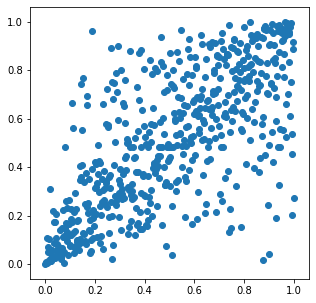

In [193]:
# rs = train.loc[:,'log return xrp']
# rf = train.loc[:,'log return future']
rs = np.array(training_Clayton.iloc[:, -1])
rf = np.array(training_Clayton.iloc[:, -2])

kde_rs = K.KDE(rs, 'Gaussian')
kde_rf = K.KDE(rf, 'Gaussian')

u = kde_rs.cdf(rs)
v = kde_rf.cdf(rf)

plt.figure(figsize=(5,5))
plt.scatter(u,v)

Text(0.5, 0, '$q$')

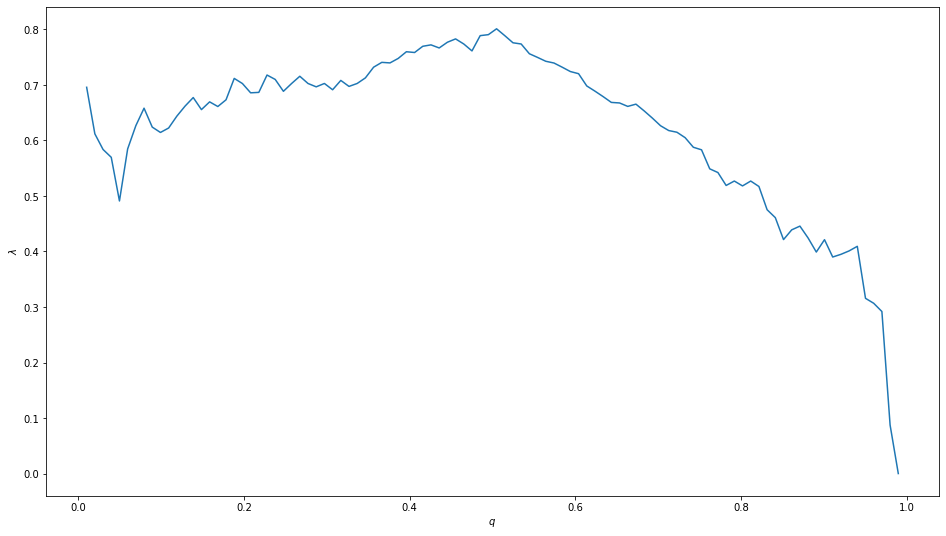

In [194]:
plt.figure(figsize=(16,9))
q_arr = np.linspace(0.01,0.99,100)
plt.plot(q_arr, [empirical_lambda(ECDF(rs)(rs), ECDF(rf)(rf), q) for q in q_arr])

plt.ylabel(r'$\lambda$')
plt.xlabel(r'$q$')

In [195]:
C1 = Gaussian(dict(rho=0.9), Law_RS=stats.norm, Law_RF=stats.norm)  # fix the maringals!
C2 = t_Copula(dict(rho=0.1, nu=4), Law_RS=stats.norm, Law_RF=stats.norm, nu_lowerbound=2)
# C2c = t_Copula(dict(rho=0.1, nu=4), Law_RS=stats.norm, Law_RF=stats.norm, nu_lowerbound=4)
C3 = Clayton(dict(theta=0.1), Law_RS=stats.norm, Law_RF=stats.norm)
C4 = Frank(dict(theta=0.1), Law_RS=stats.norm, Law_RF=stats.norm)
C5 = Gumbel(dict(theta=3), Law_RS=stats.norm, Law_RF=stats.norm)
C6 = Plackett(dict(theta=10), Law_RS=stats.norm, Law_RF=stats.norm)
C7 = Gaussian_Mix_Independent(dict(rho=.5, p=0.7), Law_RS=stats.norm, Law_RF=stats.norm)

In [196]:
from KDEs import *

kde_brr = KDE(rs, "Gaussian")
kde_btc = KDE(rf, "Gaussian")

In [197]:
q_arr = [0.05,0.1,0.9,0.95]

u = ECDF(rs)(rs)
v = ECDF(rf)(rf)
Copulae_names = ['Gaussian', 't_Copula', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep']
Copulae_arr = [C1, C2, C3, C4, C5, C6, C7]
Copulae = dict(zip(Copulae_names, Copulae_arr))
for C_name in Copulae:
    if (C_name == 't_Copula') or (C_name == 't_Copula_Capped'):
        Copulae[C_name].__init__(Copulae[C_name].paras, kde_brr, kde_btc, nu_lowerbound=2.001)
        Copulae[C_name].mm_calibrate(u,v,q_arr)
    else:
        Copulae[C_name].__init__(Copulae[C_name].paras, kde_brr, kde_btc)
        Copulae[C_name].mm_calibrate(u,v,q_arr)

../../src/copulae1.py:167: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  m_hat = np.array([self.tau()] + [self._lambda(q) for q in q_arr])


Optimization terminated successfully.
         Current function value: 0.035132
         Iterations: 34
         Function evaluations: 72


../../src/toolbox.py:55: RuntimeWarning: overflow encountered in double_scalars
  fn = lambda s: s ** (self.nu - 1) * np.exp(-s ** 2 / 2) * self.MN.cdf(s * b / np.sqrt(self.nu))
../../src/toolbox.py:55: RuntimeWarning: invalid value encountered in double_scalars
  fn = lambda s: s ** (self.nu - 1) * np.exp(-s ** 2 / 2) * self.MN.cdf(s * b / np.sqrt(self.nu))
../../src/toolbox.py:56: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return 2 ** (1 - (self.nu / 2)) / gamma(self.nu / 2) * scipy.integrate.quad(fn, 0, np.inf)[0]


Optimization terminated successfully.
         Current function value: 0.035338
         Iterations: 183
         Function evaluations: 358
Optimization terminated successfully.
         Current function value: 0.111144
         Iterations: 42
         Function evaluations: 92
Optimization terminated successfully.
         Current function value: 0.058687
         Iterations: 48
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.211476
         Iterations: 36
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.036803
         Iterations: 41
         Function evaluations: 91
Optimization terminated successfully.
         Current function value: 0.034969
         Iterations: 108
         Function evaluations: 211


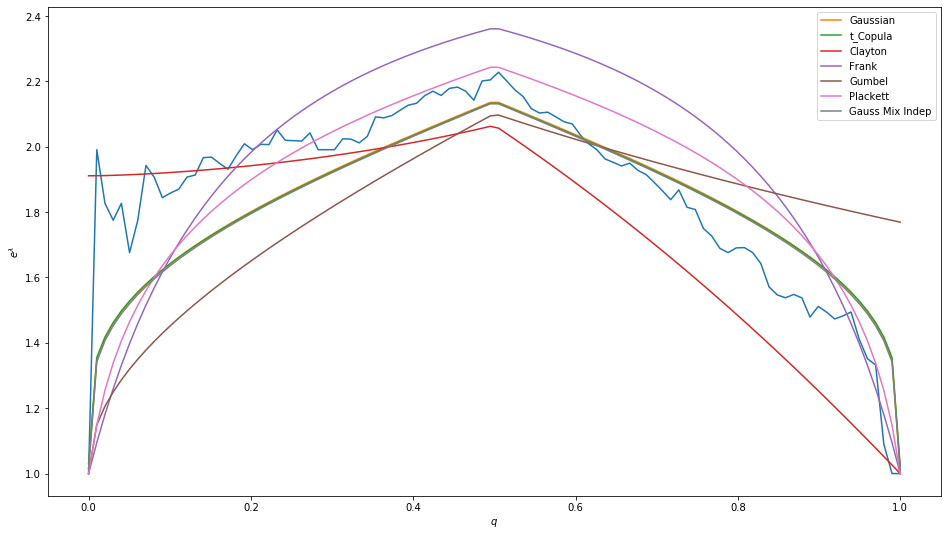

In [198]:
plt.figure(figsize=(16,9))
q_arr = np.linspace(0.000000001,0.9999999999,100)
plt.plot(q_arr, np.exp([empirical_lambda(ECDF(rs)(rs), ECDF(rf)(rf), q) for q in q_arr]))

for C_name in Copulae:
    plt.plot(q_arr, np.exp([Copulae[C_name]._lambda(q) for q in q_arr]), label=C_name)
    
plt.legend()
plt.ylabel(r'$e^\lambda$')
plt.xlabel(r'$q$')

plt.savefig('../../latex/Figures/Tables/xrp_quantile_dependence.pdf', transparent=True)


$C_{180}(u_1, u_2)=u_1+u_2-1+C(1-u_1,1-u_2)$

In [199]:
q_arr = [0.05,0.1,0.9,0.95]
C5.mm_calibrate(1-u, 1-v, q_arr)
# C5.canonical_calibrate(1-u, 1-v)

Optimization terminated successfully.
         Current function value: 0.015525
         Iterations: 31
         Function evaluations: 66


array([1.97038307])

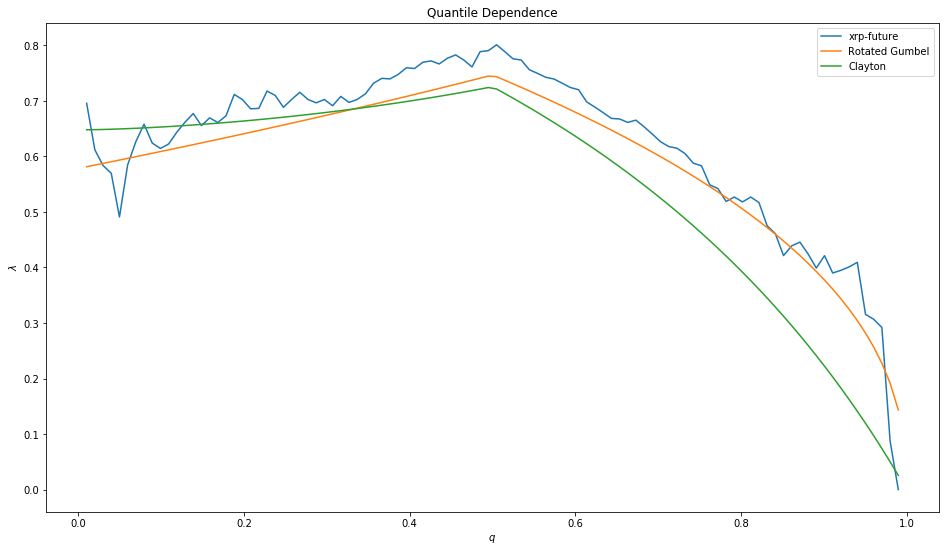

In [200]:
plt.figure(figsize=(16,9))
q_arr = np.linspace(0.01,0.99,100)
plt.title('Quantile Dependence')
plt.plot(q_arr, ([empirical_lambda(ECDF(rs)(rs), ECDF(rf)(rf), q) for q in q_arr]), label='xrp-future')
plt.plot(1-q_arr, ([C5._lambda(q) for q in q_arr]), label='Rotated Gumbel')
plt.plot(q_arr, [C3._lambda(q) for q in q_arr], label='Clayton')
plt.ylabel(r'$\lambda$')
plt.xlabel(r'$q$')
plt.legend()
plt.savefig('../../latex/Figures/Tables/xrp_rotated_gumbel_vs_clayton.pdf', transparent=True)


Asymetric: Gumbel, Clayton, NIG, Rotated Gumbel --> Financial Data stylized fact
Symetric: Gaussian, t, Gauss Mix Indep, Frank, Plackett

Upper Tail Dependence: Gumbel, t, NIG? (check whether it is heavy tail)
Lower Tail Dependence: Rotated Gumbel, Clayton, t, NIG? 

Gauss Mix Indep controls off diagonal by p 
t rho and nu 

Insight for Plackett? we can be open: "we considered Plackett, but it does not bring insight"

../../src/toolbox.py:294: RuntimeWarning: invalid value encountered in power
  part2 = np.sin(self.alpha * (U + xi)) / (np.cos(U) ** (1 / self.alpha))
../../src/toolbox.py:295: RuntimeWarning: invalid value encountered in power
  part3 = (np.cos(U - self.alpha * (U + xi)) / W) ** ((1 - self.alpha) / self.alpha)


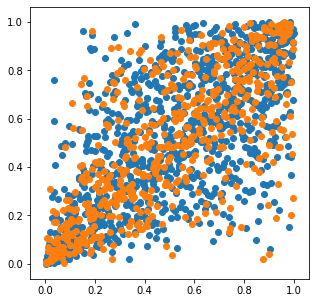

In [201]:
s = C5.sample(1000)

a = ECDF(s[:,0])(s[:,0])
b = ECDF(s[:,1])(s[:,1])
plt.figure(figsize=(5,5))
plt.scatter(1-a, 1-b)
plt.scatter(u,v)

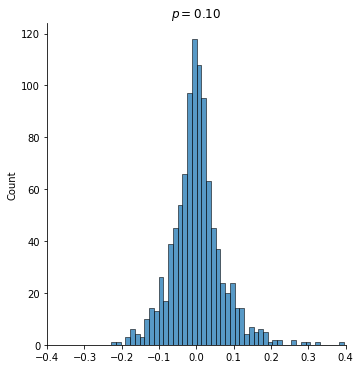

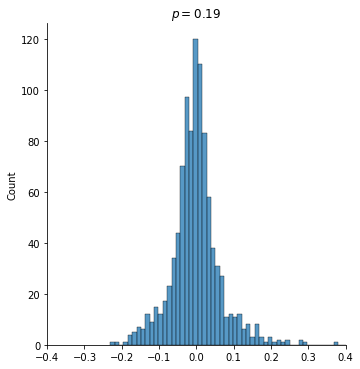

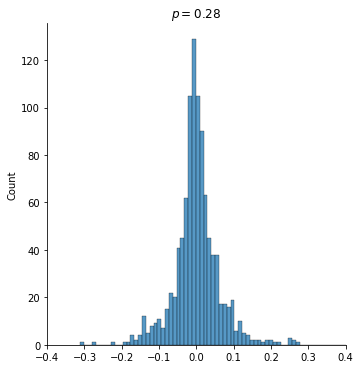

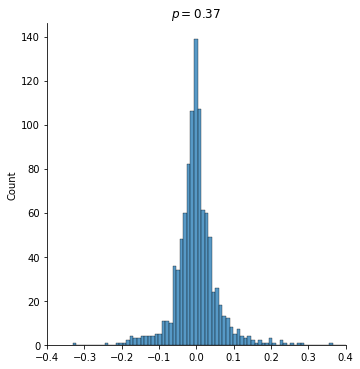

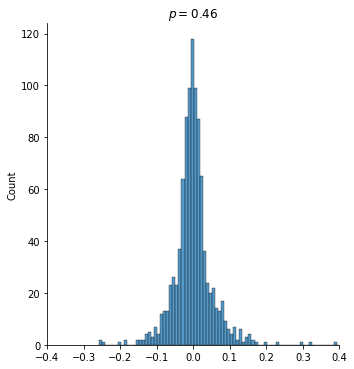

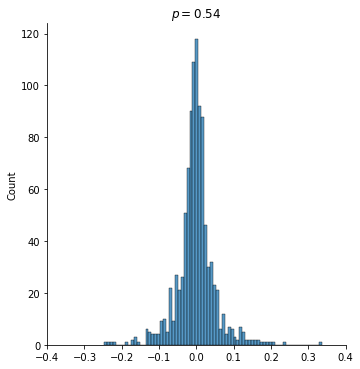

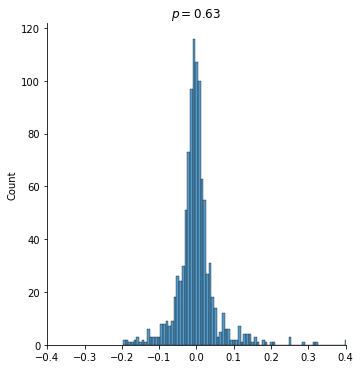

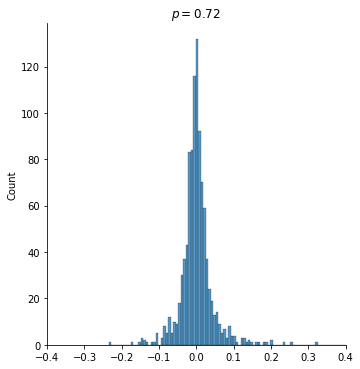

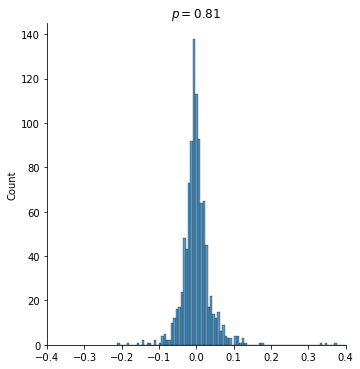

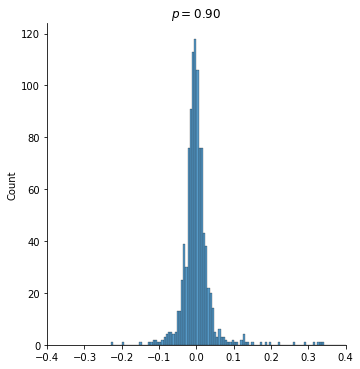

In [403]:
# Effect of adding independent noise

kde_brr = KDE(rs, "Gaussian")
kde_btc = KDE(rf, "Gaussian")

p_arr = np.linspace(0.1,0.9,10)
for p in p_arr:
    C7a = Gaussian_Mix_Independent(dict(rho=.9, p=p), kde_brr, kde_btc)
    s = C7a.sample(1000)
    
    rh = s[:,0] - s[:,1]
    sns.displot(rh)
    plt.title(r'$p=%.2f$'%p)
    plt.xlim((-0.4,0.4))
    
#     a = ECDF(s[:,0])(s[:,0])
#     b = ECDF(s[:,1])(s[:,1])
#     plt.figure(figsize=(5,5))
#     plt.scatter(a, b)

In [408]:
data_name = 'BBT_future_Tiingo_xrp'
paras = pd.read_json("../../results/" + data_name + "/MM/parameters.json")
paras.iloc[-1,:]

97.csv              {'rho': 0.8683605617, 'p': 0.8811250656}
83.csv        {'rho': 0.9210003280000001, 'p': 0.7318263372}
68.csv        {'rho': 0.9110229270000001, 'p': 0.7537363423}
6.csv                      {'rho': 0.6174915606, 'p': 0.999}
54.csv              {'rho': 0.8288288055, 'p': 0.8472480154}
40.csv                     {'rho': 0.7226808324, 'p': 0.999}
41.csv                     {'rho': 0.7309834508, 'p': 0.999}
7.csv                      {'rho': 0.6210739544, 'p': 0.999}
55.csv              {'rho': 0.8435502599, 'p': 0.8304737221}
69.csv        {'rho': 0.9164836515, 'p': 0.7417549010000001}
82.csv     {'rho': 0.9180471358000001, 'p': 0.73832055390...
96.csv               {'rho': 0.8295810629, 'p': 0.920083352}
80.csv        {'rho': 0.8636209754, 'p': 0.7824518300000001}
94.csv              {'rho': 0.8941695213, 'p': 0.8415273646}
43.csv              {'rho': 0.7972322099, 'p': 0.9170773311}
57.csv              {'rho': 0.8285351649, 'p': 0.8329510892}
5.csv                   